In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,IsolationForest
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,accuracy_score, f1_score
from sklearn import metrics 
from sklearn.calibration import CalibratedClassifierCV

In [2]:
df = pd.read_csv(r"C:\Users\..(file path)..\Trojan_Detection.csv")

In [3]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17-07-2017 01:18,10743584,4,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17-07-2017 10:25,254217,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2,96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30-06-2017 07:16,1023244,1,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13-07-2017 03:48,286483,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4,169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05-07-2017 10:47,65633087,12,...,32,322594.0,0.0,322594,322594,60306983.0,0.0,60306983,60306983,0


In [4]:
df.select_dtypes(exclude='object')

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,49975,80,6,10743584,4,4,372,672,372,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,72089,49169,443,17,254217,6,7,3191,5246,1350,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2,96676,37749,53,17,1023244,1,1,30,179,30,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,42891,41352,53,17,286483,1,1,40,106,40,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4,169326,44353,443,6,65633087,12,10,767,5622,403,...,32,322594.0,0.0,322594,322594,60306983.0,0.0,60306983,60306983,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177477,40740,60811,80,6,40648037,2,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
177478,82587,33004,80,6,2037177,2,0,0,0,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
177479,66647,51049,443,6,397316,9,7,867,4439,607,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
177480,7987,9145,53,17,32073,1,1,37,77,37,...,44,0.0,0.0,0,0,0.0,0.0,0,0,1


In [5]:
df2 = df.select_dtypes(exclude='object')


In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df2.iloc[:, :-1].values)
y = df2.iloc[:, -1].values

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [8]:
models = dict()
models['Linear Regression'] = LogisticRegression(max_iter=1000)
models['XGB']= XGBClassifier(n_estimators=5000)
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['Decision Tree'] = DecisionTreeClassifier(max_depth=100)
models['Random Forest'] = RandomForestClassifier()
models['kNN'] = KNeighborsClassifier()
models['SGD']=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=100, tol=None)
for model in models:
    models[model].fit(x_train, y_train)
    print(model + " model fitting completed.")

Linear Regression model fitting completed.
XGB model fitting completed.
Support Vector Machine model fitting completed.
Decision Tree model fitting completed.
Random Forest model fitting completed.
kNN model fitting completed.
SGD model fitting completed.


Test Set Prediction:

--------------------Linear Regression--------------------
              precision    recall  f1-score   support

           0    0.99826   0.99405   0.99615     26040
           1    0.99433   0.99835   0.99633     27205

    accuracy                        0.99624     53245
   macro avg    0.99630   0.99620   0.99624     53245
weighted avg    0.99625   0.99624   0.99624     53245



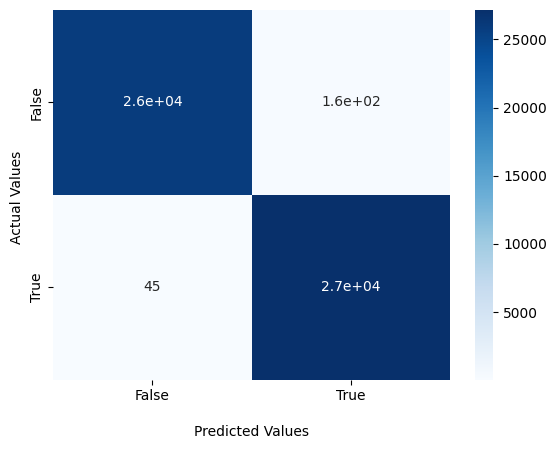

--------------------XGB--------------------
              precision    recall  f1-score   support

           0    0.99996   0.99981   0.99988     26040
           1    0.99982   0.99996   0.99989     27205

    accuracy                        0.99989     53245
   macro avg    0.99989   0.99989   0.99989     53245
weighted avg    0.99989   0.99989   0.99989     53245



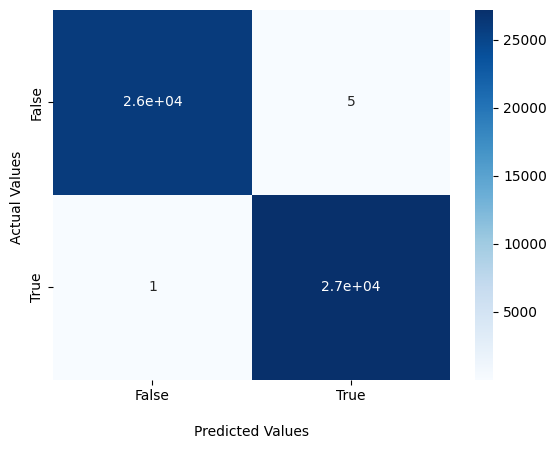

--------------------Support Vector Machine--------------------
              precision    recall  f1-score   support

           0    0.82735   0.82719   0.82727     26040
           1    0.83462   0.83477   0.83470     27205

    accuracy                        0.83106     53245
   macro avg    0.83098   0.83098   0.83098     53245
weighted avg    0.83106   0.83106   0.83106     53245



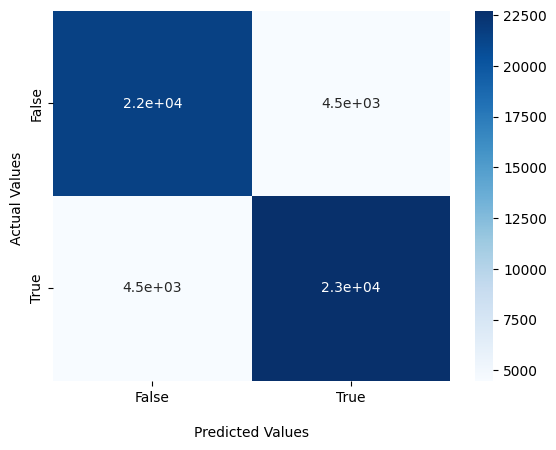

--------------------Decision Tree--------------------
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     26040
           1    1.00000   1.00000   1.00000     27205

    accuracy                        1.00000     53245
   macro avg    1.00000   1.00000   1.00000     53245
weighted avg    1.00000   1.00000   1.00000     53245



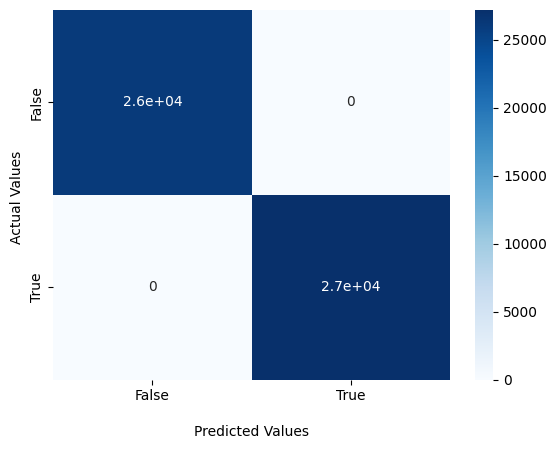

--------------------Random Forest--------------------
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     26040
           1    1.00000   1.00000   1.00000     27205

    accuracy                        1.00000     53245
   macro avg    1.00000   1.00000   1.00000     53245
weighted avg    1.00000   1.00000   1.00000     53245



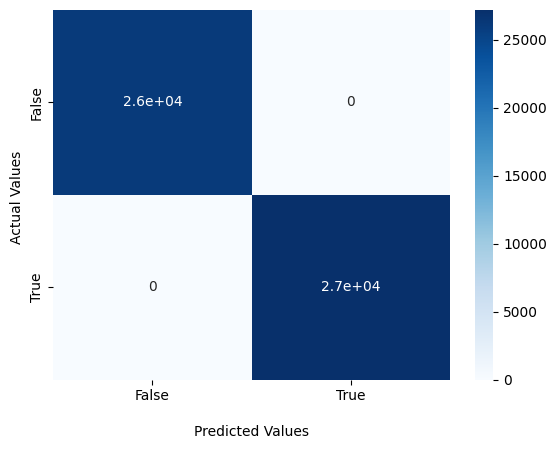

--------------------kNN--------------------
              precision    recall  f1-score   support

           0    0.98498   0.98472   0.98485     26040
           1    0.98537   0.98563   0.98550     27205

    accuracy                        0.98518     53245
   macro avg    0.98518   0.98517   0.98517     53245
weighted avg    0.98518   0.98518   0.98518     53245



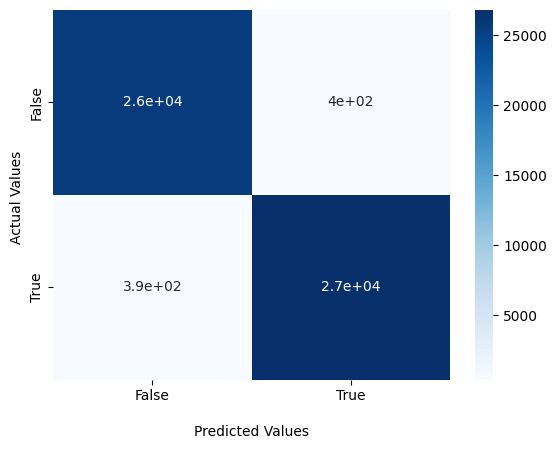

--------------------SGD--------------------
              precision    recall  f1-score   support

           0    0.99403   0.99163   0.99283     26040
           1    0.99201   0.99430   0.99315     27205

    accuracy                        0.99299     53245
   macro avg    0.99302   0.99297   0.99299     53245
weighted avg    0.99300   0.99299   0.99299     53245



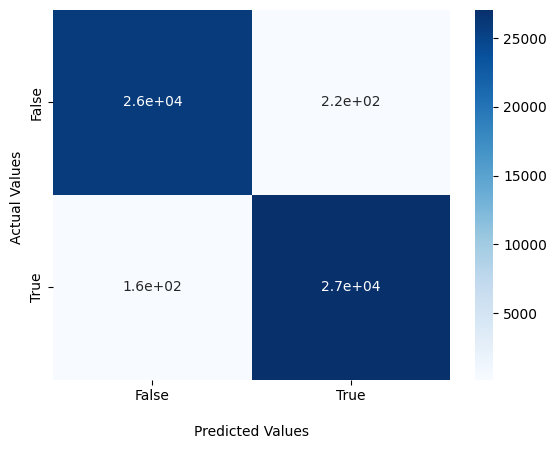

In [9]:
print("Test Set Prediction:\n")
for x in models:
    print('-'*20+x+'-'*20)
    y_pred = models[x].predict(x_test)
    print(classification_report(y_test, y_pred,digits=5))
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

--------------------VotingClassifier--------------------
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     26040
           1    1.00000   1.00000   1.00000     27205

    accuracy                        1.00000     53245
   macro avg    1.00000   1.00000   1.00000     53245
weighted avg    1.00000   1.00000   1.00000     53245



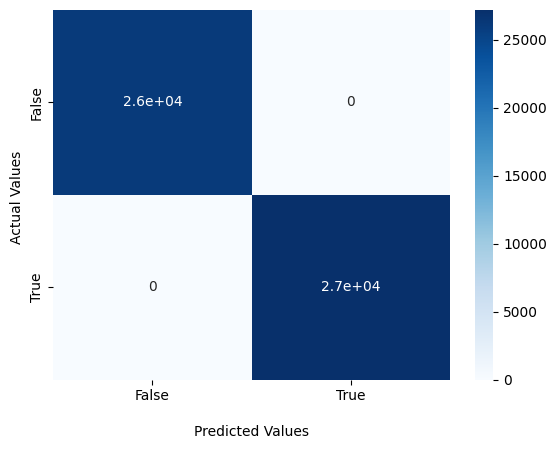

In [10]:
LogisticRegression(class_weight='balanced')
logistic_regression = LogisticRegression(max_iter=5000);
RF=RandomForestClassifier()
XGB= XGBClassifier(n_estimators=1000)
model = VotingClassifier (estimators=[('lr',logistic_regression), ('RF',RF),('XGB',XGB)], voting='soft')
model.fit(x_train, y_train);
y_pred = model.predict(x_test);
x='VotingClassifier'
print('-'*20+x+'-'*20)
print(classification_report(y_test, y_pred,digits=5))
y_pred = model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [11]:
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(x_train,y_train) 

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('MultinomialNB', MultinomialNB())])

--------------------MultinomialNB--------------------
              precision    recall  f1-score   support

           0    0.64287   0.74762   0.69130     26040
           1    0.71379   0.60246   0.65342     27205

    accuracy                        0.67345     53245
   macro avg    0.67833   0.67504   0.67236     53245
weighted avg    0.67910   0.67345   0.67194     53245



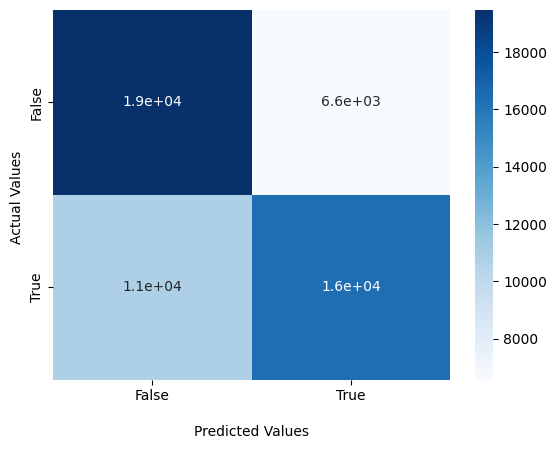

In [12]:
print('-'*20+"MultinomialNB"+'-'*20)
y_pred = p.predict(x_test)
print(classification_report(y_test, y_pred,digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
Mnp = Pipeline([('Normalizing',MinMaxScaler()),('ComplementNB',ComplementNB())])
Mnp.fit(x_train,y_train) 

In [13]:
print('-'*20+"Complement NB"+'-'*20)
y_pred = Mnp.predict(x_test)
print(classification_report(y_test, y_pred,digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

--------------------Complement NB--------------------


NameError: name 'Mnp' is not defined